# EDA OF KAGGLE HOUSE PRICES

### Check everything for nulls, bad values, inconsistent variables, plan preprocessing/handling

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn import set_config
set_config(transform_output='pandas')

In [9]:
houses_raw = pd.read_csv('../Data and Notes/train.csv')
houses_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# Info check

houses_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# Describe check

houses_raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
#Number of features (81) and rows (1460)

houses_raw.shape

(1460, 81)

In [13]:
# Categorical Feature details

obj_col = houses_raw.select_dtypes(include='object')

# Lists all object features below for observation

for col in obj_col:
  print(f'{obj_col[col].value_counts()}\n')

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Ve

In [14]:
# Determiend everything from above is a categorical, variable, take a count

obj_col.shape[1]

43

In [15]:
# Number of Numeric Features

num_col = houses_raw.select_dtypes(include='number')

num_col.shape


(1460, 38)

In [16]:
# Quick check for binary columns

binary_check = num_col.columns[num_col.max() == 1]
binary_check

Index([], dtype='object')

In [17]:
# Check that everything is covered, should equal 0 if all columns were covered

obj_col.shape[1] + num_col.shape[1] - houses_raw.shape[1]

0

In [18]:
# Dupe check -- no dupes

houses_raw.duplicated().sum()

np.int64(0)

In [19]:
houses_clean = houses_raw.copy()

## 0 - ID

* All unique values
* 0 nulls
* Row identifier - each row is a house
* Updating this colums to index

In [20]:
# Check for dupes in ID Columns -- none

houses_clean['Id'].duplicated().sum()

np.int64(0)

In [21]:
houses_clean = houses_clean.set_index('Id')

In [22]:
houses_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1 -  MSSubClass

* Each number represents a dwelling type
* 0 nulls
* Nominal
* Convert to str - originally int, column is truly nominal

In [23]:
houses_clean['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [24]:
houses_clean['MSSubClass'].dtype

dtype('int64')

## 2 - MSZoning

* Identifies the general zoning classification of the sale
* 0 nulls
* Nominal

In [25]:
houses_clean['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

## 3 - LotFrontage
* Feet of street connected to property
* 259 nulls
* Numeric

Lot frontage is the measure of how many feet of the property faces a public road. 259 nulls is 17.74% of the total, which would be a high number to remove due to the size of the dataset. It is rare for a home to have no frontage, unless they are "landlocked" completely. Frontage has a slight positive correlation to price.

No clear reason for missing values after analysis. Will impute values during preprocess -- 0 frontage is unlikely and there is a correlation to target


In [26]:
# What % missing

houses_clean['LotFrontage'].isna().sum() / houses_clean.shape[0]

np.float64(0.1773972602739726)

<Axes: >

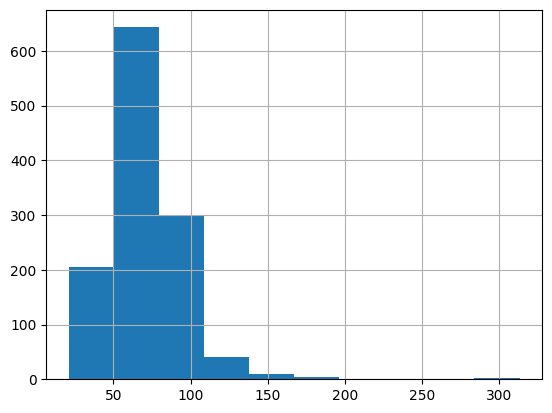

In [27]:
# Distribution check

houses_clean['LotFrontage'].hist()

In [28]:
# Check min values -- 0 doesn't exist

houses_clean['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [29]:
# Check correlation of LotFrontage with other columns

# Create function to easily pull corr

def corr(df_col):
  corr_mat = houses_clean.select_dtypes(include='number').corr()
  col_corr = corr_mat[df_col].sort_values(ascending = False)
  return col_corr

corr('LotFrontage')

# Frontage is too correlated to target to drop 17% of the data in small dataset


LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFrontage, dtype: float64

In [30]:
# No frontage could be due to home off the grid. Compare to driveway type
# -- (i.e unpaved driveway could be out in country with 0 frontage )

frontagecheck = houses_clean[['PavedDrive', 'LotFrontage']]

# Fill filtered NAs with 0 so plot can be made

frontagecheck['LotFrontage'] = frontagecheck['LotFrontage'].fillna(0)


C:\Users\nick_\AppData\Local\Temp\ipykernel_47948\117287999.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frontagecheck['LotFrontage'] = frontagecheck['LotFrontage'].fillna(0)


In [31]:
#Check that NA fill worked

frontagecheck['LotFrontage'].isna().sum()


np.int64(0)

In [32]:
# Filter frontage to only show 0 values -- 0 surrogate for NA

frontagecheck = frontagecheck[frontagecheck['LotFrontage'] == 0]

In [33]:
# Double check that frontage only shows former NA columns

frontagecheck.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259 entries, 8 to 1447
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PavedDrive   259 non-null    object 
 1   LotFrontage  259 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.1+ KB


<Axes: xlabel='PavedDrive', ylabel='count'>

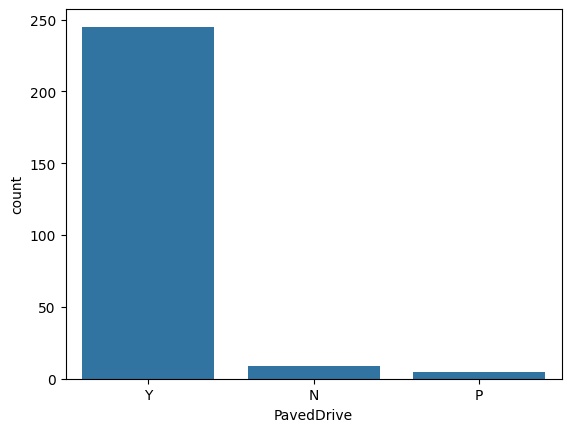

In [34]:
# Plot which drveway types are in the null values in frontage

sns.countplot(x='PavedDrive', data=frontagecheck)

# Almost all frontage nulls are paved driveway, invalidating non-suburb theory
# Impute values in preprocessing rather than 0

## 4 - LotArea
* Lot size in sq ft
* No nulls
* Numeric

No changes to column

<Axes: >

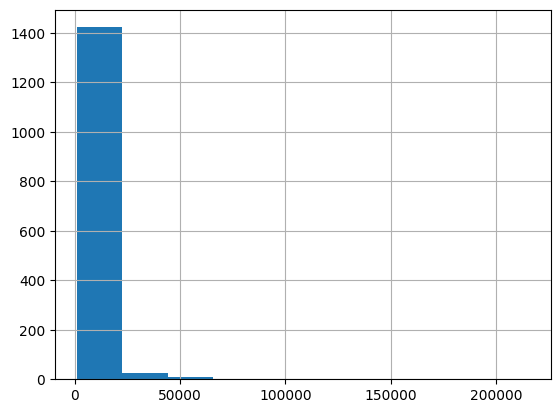

In [35]:
houses_clean['LotArea'].hist()

## 5 - Street

* Type of road access to property
* 0 nulls
* Nominal

In [36]:
houses_clean['Street'].value_counts()


Street
Pave    1454
Grvl       6
Name: count, dtype: int64

## 6 - Alley

* Type of alley access to property
* 1352 nulls
* Nominal

Data dictionary lists NA value as "no alley". Convert all NaaNs to string NA

In [37]:
# NA means there is no alley next to house according to data dictionary and this is majority of items
# make sure NA "No Alley" value is not registering as NaaN

houses_clean['Alley'].value_counts(dropna=False)

# NaN in this columns is true NaN, will impute to NA string in preprocess


Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64

## 7 - LotShape

* General shape of property
* No nulls
* Nominal
* No changes

In [38]:
houses_clean['LotShape'].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

## 8 - LandContour

* Flatness of land
* 0 nulls
* Nominal
* No changes to column

In [39]:
houses_clean['LandContour'].value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

## 9 - Utilities      

* Utility Type
* 0 nulls
* All but one value is the same, keeping all values

In [40]:
houses_clean['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

## 10 - LotConfig

* Lot configuration/layout
* 0 nulls
* Nominal
* No changes

In [41]:
houses_clean['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

## 11 - LandSlope


* Slope of property
* 0 nulls
* Nominal
* All three categories assume some sort of sloped, aka nothing considered flat


In [42]:
houses_clean['LandSlope'].value_counts()


LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

## 12 - Neighborhood


* Neighborhood of physical location
* 0 nulls
* Nominal

In [43]:
houses_clean['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

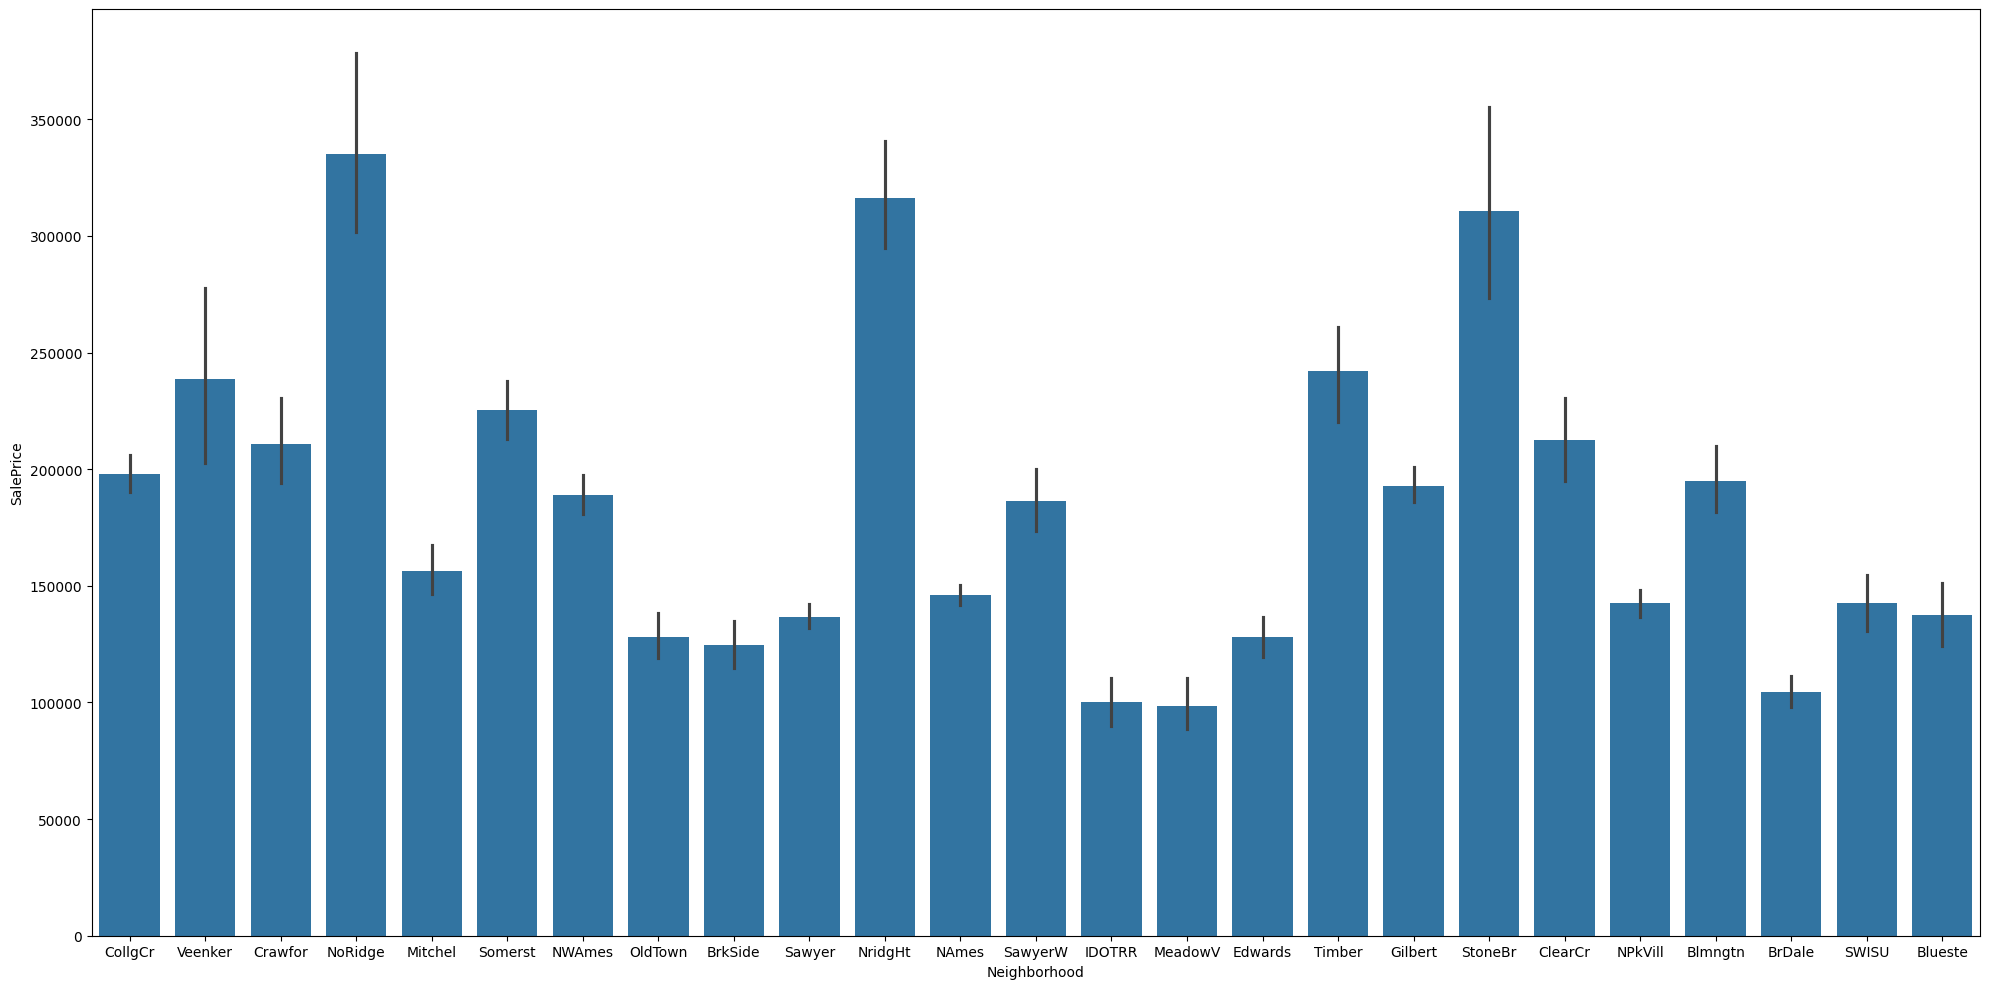

In [44]:
# Check avg sale by neighborhood

plt.figure(figsize=(20,10))

sns.barplot(x='Neighborhood', y='SalePrice', estimator='mean', data=houses_clean)
plt.tight_layout()

## 13 - Condition1

* Proximity to various conditions
* 0 nulls
* Nominal
* No changes

In [45]:
houses_clean['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

## 14 - Condition2

* Proximity to various conditions (if more than one is present)
* 0 nulls
* Nominal
* No changes

In [46]:
houses_clean['Condition2'].value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

## 15 - BldgType


* Type of dwelling
* 0 nulls
* Nominal
* No changes

In [47]:
houses_clean['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

## 16 - HouseStyle



* Style of dwelling
* 0 nulls
* Nominal
* No changes

In [48]:
houses_clean['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

## 17 - OverallQual

* Rates the overall material and finish of the house
* No nulls
* Ordinal
* No changes

In [49]:
houses_clean['OverallQual'].value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

<Axes: >

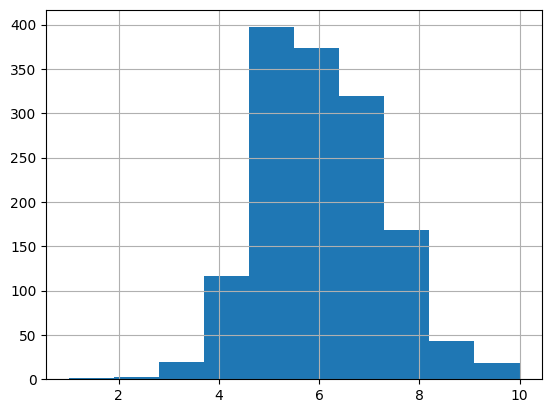

In [50]:
# Look at distribution

houses_clean['OverallQual'].hist()

## 18 - OverallCond

* Overall condition
* 0 nulls
* Ordinal
* No changes

In [51]:
houses_clean['OverallCond'].value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

## 19 - YearBuilt

* Original constrx date
* 0 nulls
* Nominal - Year
* No changes

<Axes: >

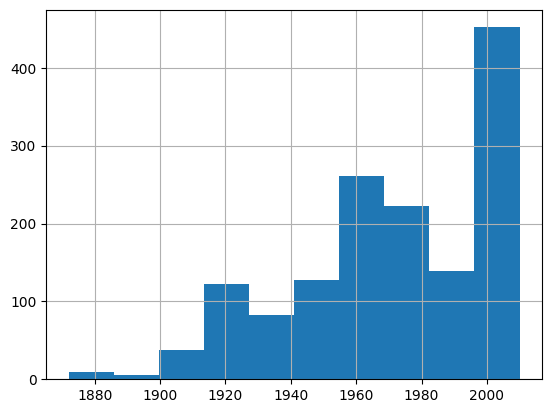

In [52]:
houses_clean['YearBuilt'].hist()

In [53]:
# Check year built correlation

corr('YearBuilt')

YearBuilt        1.000000
GarageYrBlt      0.825667
YearRemodAdd     0.592855
OverallQual      0.572323
GarageCars       0.537850
SalePrice        0.522897
GarageArea       0.478954
FullBath         0.468271
TotalBsmtSF      0.391452
MasVnrArea       0.315707
1stFlrSF         0.281986
BsmtFinSF1       0.249503
HalfBath         0.242656
WoodDeckSF       0.224880
GrLivArea        0.199010
OpenPorchSF      0.188686
BsmtFullBath     0.187599
BsmtUnfSF        0.149040
Fireplaces       0.147716
LotFrontage      0.123349
TotRmsAbvGrd     0.095589
3SsnPorch        0.031355
MSSubClass       0.027850
LotArea          0.014228
MoSold           0.012398
2ndFlrSF         0.010308
PoolArea         0.004950
YrSold          -0.013618
MiscVal         -0.034383
BsmtHalfBath    -0.038162
BsmtFinSF2      -0.049107
ScreenPorch     -0.050364
BedroomAbvGr    -0.070651
KitchenAbvGr    -0.174800
LowQualFinSF    -0.183784
OverallCond     -0.375983
EnclosedPorch   -0.387268
Name: YearBuilt, dtype: float64

## 20 - YearRemodAdd

* Remodel date -- if never remodel then constrx date
* No nulls
* Numeric - Year

In [54]:
houses_clean['YearRemodAdd'].value_counts()

YearRemodAdd
1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: count, Length: 61, dtype: int64

In [55]:
houses_clean['YearRemodAdd'].describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

## 21 - RoofStyle

* Type of roof
* 0 nulls
* Nominal
* No changes

In [56]:
houses_clean['RoofStyle'].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

## 22 - RoofMatl

* Roof material
* 0 nulls
* Nominal
* No changes

In [57]:
houses_clean['RoofMatl'].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

## 23 - Exterior1st

* Exterior house covering
* One null
* Nominal
* No changes

In [58]:
houses_clean['Exterior1st'].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

## 24 - Exterior2nd

* If more than one, second exterior covering
* 0 nulls
* Nominal
* No changes

In [59]:
houses_clean['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

## 25 - MasVnrType

* Masonry veneer type
* 872 nulls
* Nominal

Column was missing more than 50% values, however, data dictionary shows that there is a "None" option if a house has no masonry. Checked against Masonry Area column below, found that all but 8 NaNs in type showed a 0 value in area. Masonry area is morev highly correlated to sale price so using type columns in order to impute values in area column if possible. Making assumption that all but those 5 are actually none type and updated accordingly. Dropped the rows where area shows greater than 0 with no type listed as some showed 1 sqft for area and across the board those 5 rows look to be error either in area or type column. 

In [60]:
houses_clean['MasVnrType'].value_counts(dropna=False)

MasVnrType
NaN        872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [61]:
# Missing Values

houses_clean['MasVnrType'].isna().sum()

np.int64(872)

In [62]:
# What % is missing?

houses_clean['MasVnrType'].isna().sum() / houses_clean.shape[0] * 100

np.float64(59.726027397260275)

In [63]:
# Want to check how masonry area and type look next to each other, NA for masonry type is actually a value for no masonry
# Separating these columns for further evaluation

mason_check = houses_clean[houses_clean['MasVnrType'].isna()][['MasVnrType', 'MasVnrArea']]
mason_check

,MasVnrType,MasVnrArea
Id,,
2,NaN,0.0
4,NaN,0.0
6,NaN,0.0
9,NaN,0.0
10,NaN,0.0
...,...,...
1455,NaN,0.0
1456,NaN,0.0
1458,NaN,0.0


In [64]:
# Look for rows where type is NaN (substitute for no masonry) but area is larger than 0

# This means no masonry type is listed but there is area so masonry exists

# Can't determine if type NaN is in error or if the area is in error, will drop these rows

mason_to_drop = mason_check[mason_check['MasVnrArea'] > 0]

mason_to_drop

,MasVnrType,MasVnrArea
Id,,
625,NaN,288.0
774,NaN,1.0
1231,NaN,1.0
1301,NaN,344.0
1335,NaN,312.0


In [65]:
# Drop values above

houses_clean = houses_clean.drop(mason_to_drop.index)

In [66]:
# Work check

houses_clean[((houses_clean['MasVnrType'].isna()) & (houses_clean['MasVnrArea'] > 0))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [67]:
# Work check

houses_clean['MasVnrType'].isna().sum()

np.int64(867)

## 26	- MasVnrArea

* Masonry veneer area
* 8 nulls
* Numeric

In the previous column we removed NaNs in Masonry Type that were missing at random. Remaining NaNs in type column will be imputed to NA for "no masonry"

The only nulls in area column are also no masonry, will impute these to 0 in preprocess

In [68]:
houses_clean['MasVnrArea'].value_counts()

MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
16.0       7
        ... 
426.0      1
96.0       1
438.0      1
194.0      1
119.0      1
Name: count, Length: 326, dtype: int64

In [69]:
# Check nulls -- only nulls in area are due to no masonry on property

houses_clean[houses_clean['MasVnrArea'].isnull()][['MasVnrArea', 'MasVnrType']]

,MasVnrArea,MasVnrType
Id,,
235,NaN,NaN
530,NaN,NaN
651,NaN,NaN
937,NaN,NaN
974,NaN,NaN
978,NaN,NaN
1244,NaN,NaN
1279,NaN,NaN


## 27	ExterQual

* Evaluates the quality of the material on the exterior
* No nulls
* Ordinal

In [70]:
houses_clean['ExterQual'].value_counts()

ExterQual
TA    902
Gd    487
Ex     52
Fa     14
Name: count, dtype: int64

## 28	ExterCond

* Evaluates the present condition of the material on the exterior
* No nulls
* Ordinal

Will ordinally encode in preprocess

In [71]:
houses_clean['ExterCond'].value_counts()

ExterCond
TA    1277
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

## 29	Foundation

* Type of foundation
* 0 nulls
* Nominal

In [72]:
houses_clean['ExterCond'].value_counts()

ExterCond
TA    1277
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

## 30	BsmtQual

* Evaluates the height of the basement
* 37 nulls
* Nominal

All NaaNs also have NaaNs or 0 across the board on all basement related questions. Now assuming this means no basement. Changing these values to "NA" -- per data dictionary this is no basement

In [73]:
houses_clean['BsmtQual'].value_counts()

BsmtQual
TA    646
Gd    616
Ex    121
Fa     35
Name: count, dtype: int64

In [74]:
houses_clean['BsmtQual'].isna().sum()

np.int64(37)

In [75]:
houses_clean[houses_clean['BsmtQual'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
157,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
183,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
260,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
363,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500


## 31	BsmtCond

* Evaluates the general condition of the basement
* 37 nulls
* Nominal

All NaaNs also have NaaNs or 0 across the board on all basement related questions. Assuming this means no basement. Changing these values to "NA" -- per data dictionary NA is no basement

In [76]:
houses_clean['BsmtCond'].isna().sum()

np.int64(37)

In [77]:
houses_clean['BsmtCond'].value_counts()

BsmtCond
TA    1306
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

## 32	BsmtExposure

* Refers to walkout or garden level walls
* 38 nulls
* Nominal

One more NaaN in this column than in other basement columns. There is one that does have a basement with square footage (basement is unfinished) but nothing in the exposure column. Most common exposure type is "no" and most common for Unfisished type is also "no" will impute with No

In [78]:
houses_clean['BsmtExposure'].value_counts()

BsmtExposure
No    948
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [79]:
houses_clean['BsmtExposure'].isna().sum()

np.int64(38)

In [80]:
houses_clean[(houses_clean['BsmtExposure'].isna()) & (~houses_clean['BsmtCond'].isna())][['BsmtExposure','BsmtCond']]

,BsmtExposure,BsmtCond
Id,,
949,NaN,TA


In [81]:
# Check what exposure types Unfinished basement types have

houses_clean[houses_clean['BsmtFinType1'] == 'Unf']['BsmtExposure'].value_counts()


BsmtExposure
No    345
Av     46
Mn     27
Gd     11
Name: count, dtype: int64

In [82]:
# Imputing here since this situation is very specific to this row
# Using most common for unfinished basement, whcih is "No" no exposure

houses_clean.loc[(houses_clean['BsmtFinType1'] == 'Unf') & (houses_clean['BsmtExposure'].isna()), 'BsmtExposure'] = 'No'


In [83]:
# Null check for one less null

houses_clean['BsmtExposure'].isnull().sum()

np.int64(37)

In [84]:
# Double check values based on index

houses_clean.loc[949, ['BsmtExposure', 'BsmtCond']]

BsmtExposure    No
BsmtCond        TA
Name: 949, dtype: object

## 33	BsmtFinType1

* BsmtFinType1
* 37 nulls
* Nominal

All NaaNs also have NaaNs or 0 across the board on all basement related questions. Now assuming this means no basement. Changing these values to "NA" -- per data dictionary this is no basement

In [85]:
houses_clean['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    416
ALQ    220
BLQ    148
Rec    131
LwQ     73
Name: count, dtype: int64

In [86]:
houses_clean['BsmtFinType1'].isna().sum()

np.int64(37)

## 34	-	BsmtFinSF1

* Type 1 finished square feet 0 
* 0 null
* numeric

<Axes: >

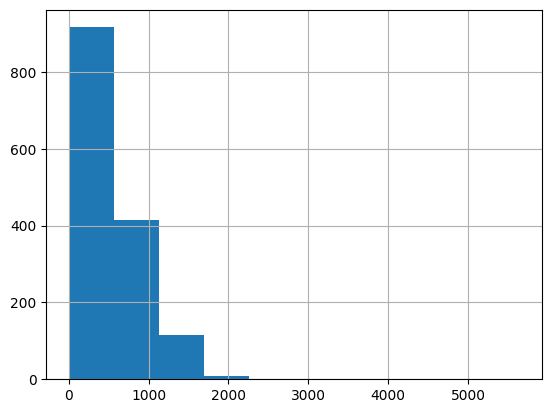

In [87]:
houses_clean['BsmtFinSF1'].hist()

In [88]:
houses_clean['BsmtFinSF1'].isnull().sum()

np.int64(0)

## 35	-	BsmtFinType2

* Type 2 finished square feet
* 42 nulls
* Ordinal

One column was missing, imputed value to Unf using most common occurence with other columns. Remaining naans will be imputed to NA no basement in preprocess


In [89]:
houses_clean['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1252
Rec      53
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [90]:
houses_clean['BsmtFinType2'].isna().sum()

np.int64(38)

In [91]:
# Nan Check, one is missing a single value in BsmtFin2

houses_clean[houses_clean['BsmtFinType2'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
157,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
183,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
260,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500


In [92]:
# What are typical responses for Fin2 when Fin 1 = GLQ

houses_clean[houses_clean['BsmtFinType1'] == 'GLQ']['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    391
LwQ     10
Rec      8
ALQ      4
BLQ      2
Name: count, dtype: int64

In [93]:
# Check for spread of answers in FinType 2 when SF2 exists

houses_clean[houses_clean['BsmtFinSF2'] > 0]['BsmtFinType2'].value_counts()

BsmtFinType2
Rec    53
LwQ    46
BLQ    33
ALQ    19
GLQ    14
Name: count, dtype: int64

In [94]:
# Impute missing value to Unf

houses_clean.loc[(houses_clean['BsmtFinType1'] == 'GLQ') & (houses_clean['BsmtFinType2'].isna()), 'BsmtFinType2'] = 'Unf'

In [95]:
# Check that 37 nulls exist

houses_clean['BsmtFinType2'].isna().sum()

np.int64(37)

## 36	-	BsmtFinSF2

* Type 2 finished square feet
* 0 null
* Numeric


<Axes: >

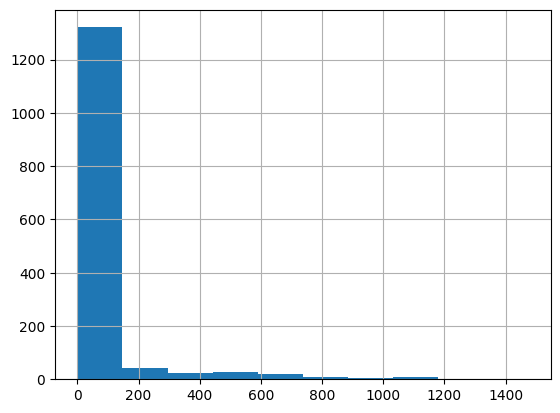

In [96]:
houses_clean['BsmtFinSF2'].hist()

In [97]:
houses_clean['BsmtFinSF2'].isna().sum()

np.int64(0)

## 37	-	BsmtUnfSF

* Unfinished square feet of basement area
* 0 null
* Numeric

<Axes: >

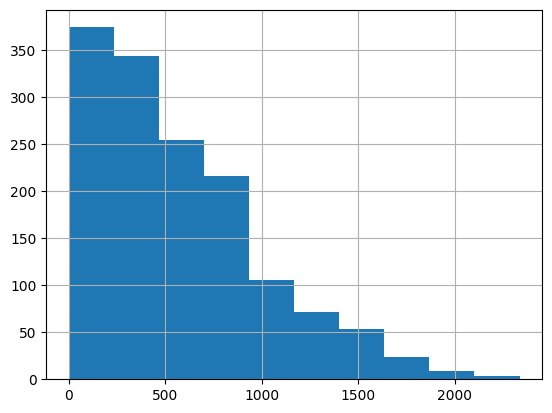

In [98]:
houses_clean['BsmtUnfSF'].hist()

In [99]:
houses_clean['BsmtFinSF2'].isna().sum()

np.int64(0)

## 38	-	TotalBsmtSF

* Total square feet of basement area
* 0 null
* Numeric
* No changes

<Axes: >

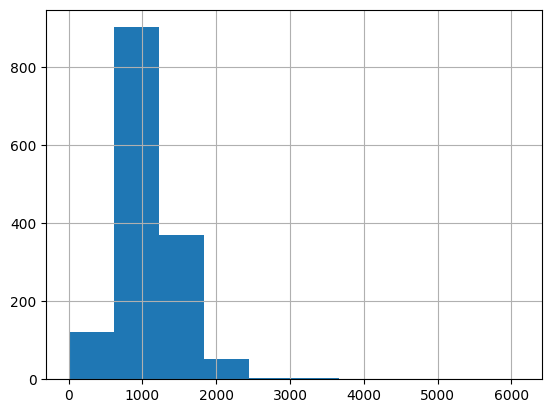

In [100]:
houses_clean['TotalBsmtSF'].hist()

## 39	-	Heating

* Type of heating
* 0	null
* Nominal

In [101]:
houses_clean['Heating'].value_counts()

Heating
GasA     1423
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

## 40	-	HeatingQC

* Heating quality and condition
* 0 null
* Ordinal

In [102]:
houses_clean['HeatingQC'].value_counts()

HeatingQC
Ex    738
TA    427
Gd    240
Fa     49
Po      1
Name: count, dtype: int64

## 41	-	CentralAir

* Central air conditioning
* 0 null
* Nominal
* No changes


In [103]:
houses_clean['CentralAir'].value_counts()

CentralAir
Y    1360
N      95
Name: count, dtype: int64

## 42	-	Electrical

* Electrical system
* 1 null
* Nominal

Standard breaker is far and away the most common, will impute with this in preprocess

In [104]:
houses_clean['Electrical'].value_counts()

Electrical
SBrkr    1330
FuseA      93
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [105]:
houses_clean[houses_clean['Electrical'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


## 43	-	1stFlrSF

* First Floor square feet
* 0 nulls
* Numeric

<Axes: >

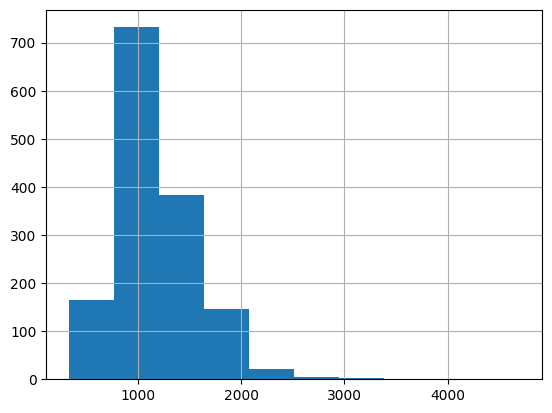

In [106]:
houses_clean['1stFlrSF'].hist()

## 44	-	2ndFlrSF

* Second floor square feet
* 0	null
* Numeric

<Axes: >

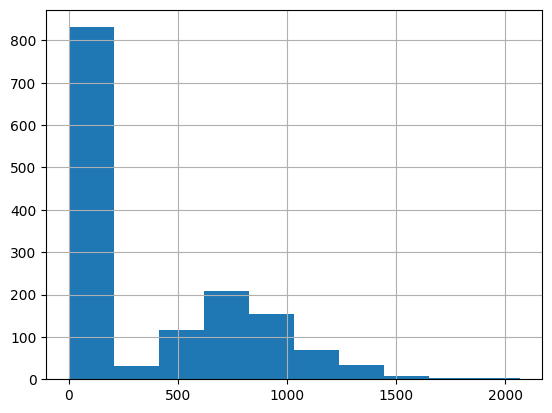

In [107]:
houses_clean['2ndFlrSF'].hist()

## 45	-	LowQualFinSF

* Low quality finished square feet (all floors)
* 0	null
* Numeric

<Axes: >

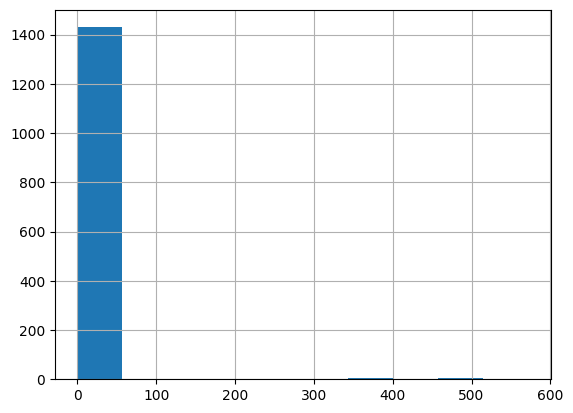

In [108]:
houses_clean['LowQualFinSF'].hist()

In [109]:
corr('LowQualFinSF')

LowQualFinSF     1.000000
GrLivArea        0.135177
TotRmsAbvGrd     0.132321
BedroomAbvGr     0.105962
2ndFlrSF         0.063895
PoolArea         0.062131
EnclosedPorch    0.061226
MSSubClass       0.046799
LotFrontage      0.038369
BsmtUnfSF        0.028009
ScreenPorch      0.026961
OverallCond      0.025366
OpenPorchSF      0.018045
BsmtFinSF2       0.014803
KitchenAbvGr     0.007861
LotArea          0.004781
FullBath        -0.000835
MiscVal         -0.002718
3SsnPorch       -0.004344
BsmtHalfBath    -0.005942
1stFlrSF        -0.014413
Fireplaces      -0.021302
MoSold          -0.022070
WoodDeckSF      -0.025574
SalePrice       -0.025709
HalfBath        -0.026632
YrSold          -0.029031
OverallQual     -0.030604
TotalBsmtSF     -0.033366
GarageYrBlt     -0.036435
BsmtFullBath    -0.047388
YearRemodAdd    -0.062683
BsmtFinSF1      -0.064446
GarageArea      -0.067661
MasVnrArea      -0.068989
GarageCars      -0.094510
YearBuilt       -0.183803
Name: LowQualFinSF, dtype: float64

## 46	-	GrLivArea

* Above grade (ground) living area square feet
* 0 null
* Numeric

<Axes: >

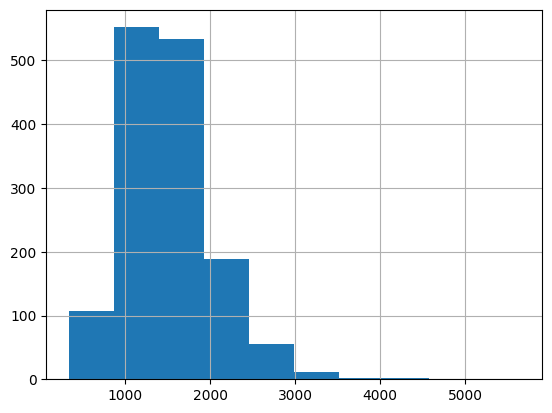

In [110]:
houses_clean['GrLivArea'].hist()

## 47	-	BsmtFullBath

* Basement full bathrooms
* 0 null
* Numeric

<Axes: >

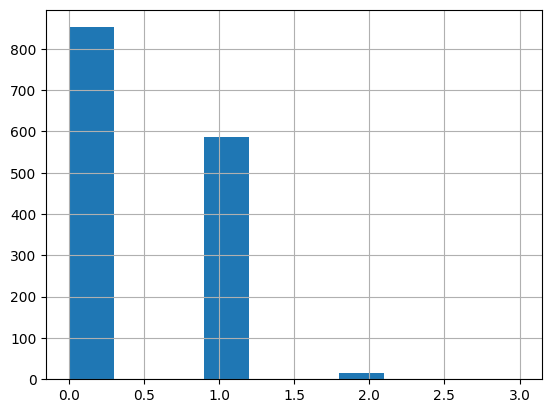

In [111]:
houses_clean['BsmtFullBath'].hist()

## 48	-	BsmtHalfBath

* Basement half bathrooms
* 0 nulls
* Numeric

<Axes: >

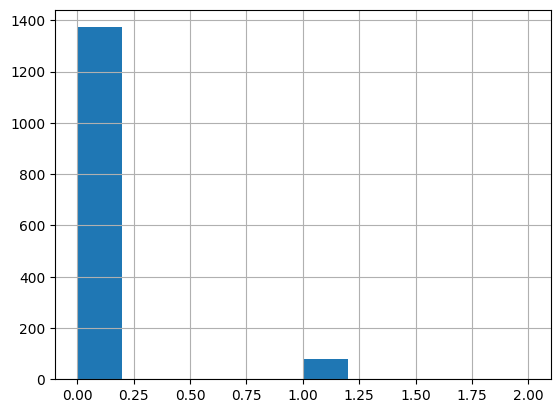

In [112]:
houses_clean['BsmtHalfBath'].hist()

## 49	-	FullBath

* Full bathrooms above grade
* 0 nulls
*Numeric

<Axes: >

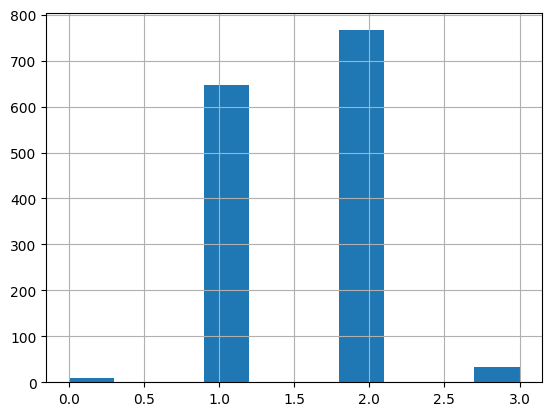

In [113]:
houses_clean['FullBath'].hist()

In [114]:
houses_clean['FullBath'].isnull().sum()

np.int64(0)

## 50	-	HalfBath

* Half baths above grade
* 0	nulls
* Numeric

<Axes: >

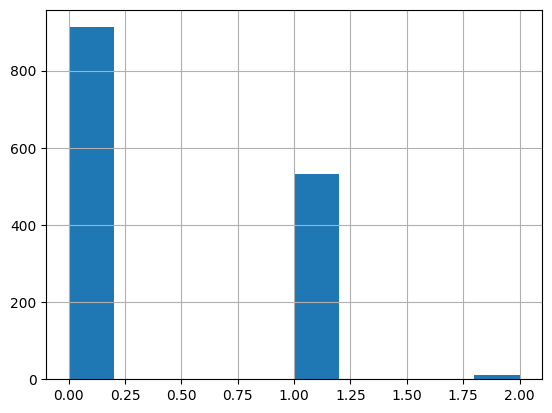

In [115]:
houses_clean['HalfBath'].hist()

## 51	-	BedroomAbvGr

* Bedrooms above grade
* 0	nulls
* Numeric

<Axes: >

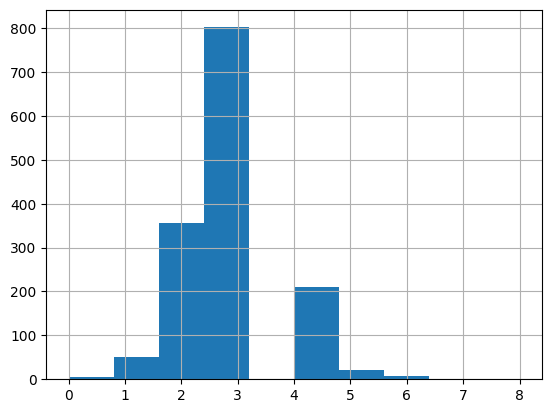

In [116]:
houses_clean['BedroomAbvGr'].hist()

## 52	-	KitchenAbvGr

* Kitchens above grade
* 0	nulls
* Numeric

<Axes: >

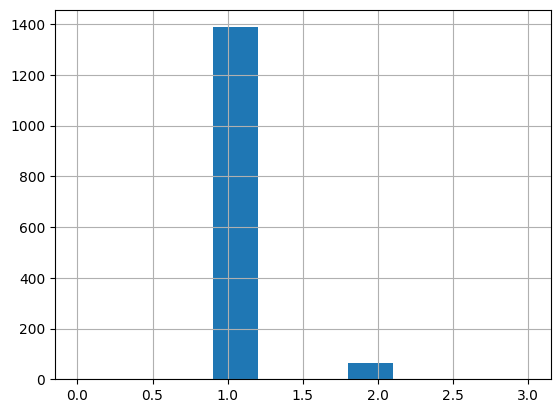

In [117]:
houses_clean['KitchenAbvGr'].hist()

## 53	-	KitchenQual

* Kitchen quality
* 1	null
* Ordinal

In [118]:
houses_clean['KitchenQual'].value_counts()

KitchenQual
TA    731
Gd    585
Ex    100
Fa     39
Name: count, dtype: int64

## 54	TotRmsAbvGrd	

* Total rooms above grade (does not include bathrooms)
* 0	nulls
* Numeric

<Axes: >

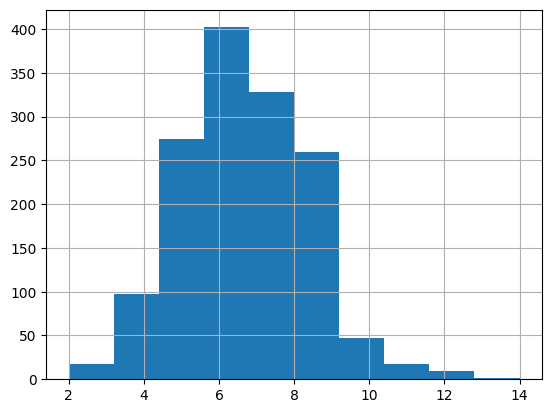

In [119]:
houses_clean['TotRmsAbvGrd'].hist()

## 55	-	Functional

* Home functionality (Assume typical unless deductions are warranted)
* 2 nulls
* Ordinal


In [120]:
houses_clean['Functional'].value_counts()

Functional
Typ     1357
Min2      33
Min1      30
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

## 56	-	Fireplaces

* Number of fireplace
* 0 nulls
* Numeric

<Axes: >

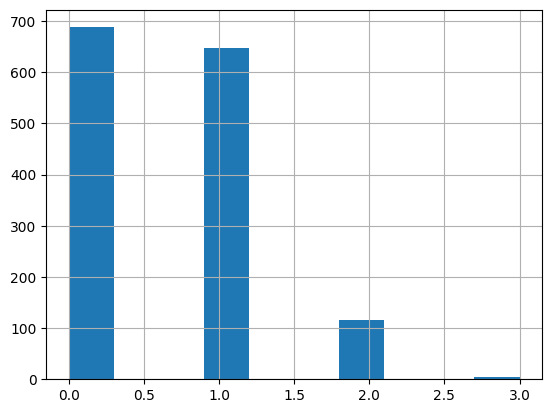

In [121]:
houses_clean['Fireplaces'].hist()

## 57	-	FireplaceQu

* Fireplace quality
* 690 nulls
* Ordinal

All missing values show 0 in fireplace count, no no fireplace exists. Will change to string NA no fireplace in preprocess

In [122]:
houses_clean['FireplaceQu'].isna().sum()

np.int64(688)

In [123]:
houses_clean['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    310
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [124]:
# Do any Nans have a fireplace count in number of fireplace column?

houses_clean[(houses_clean['Fireplaces'] > 0) & (houses_clean['FireplaceQu'].isna())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [125]:
# Double check

houses_clean[houses_clean['FireplaceQu'].isna()]['Fireplaces'].value_counts()

Fireplaces
0    688
Name: count, dtype: int64

## 58	GarageType

* Garage location
* 81 nulls
* Nominal

All nans are from homes with no garage, need to impute string NA for no garage

In [126]:
houses_clean['GarageType'].isna().sum()

np.int64(81)

In [127]:
houses_clean['GarageType'].value_counts()

GarageType
Attchd     866
Detchd     387
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [128]:
houses_clean[(houses_clean['GarageYrBlt'].isna()) & (~houses_clean['GarageType'].isna())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## 59	GarageYrBlt

* Year garage was built
* 78 nulls
* Numeric - Year

All NaNs are no garage. Will convert to string, impute "NA" in place on NaNs and one hot encode

<Axes: >

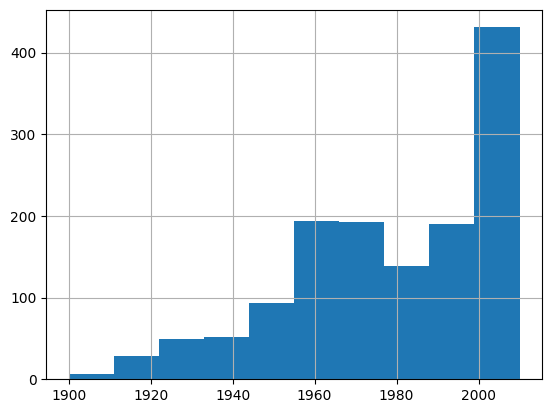

In [129]:
houses_clean['GarageYrBlt'].hist()

In [130]:
houses_clean['GarageYrBlt'].nunique()

97

## 60	GarageFinish

* Interior finish of the garage
* 78 nulls
* Nominal

Nulls are no garage, will impute string NA in preprocess

In [131]:
houses_clean['GarageFinish'].value_counts()

GarageFinish
Unf    604
RFn    419
Fin    351
Name: count, dtype: int64

## 61	GarageCars

* Size of garage in car capacity
* 0 null
* Numeric

<Axes: >

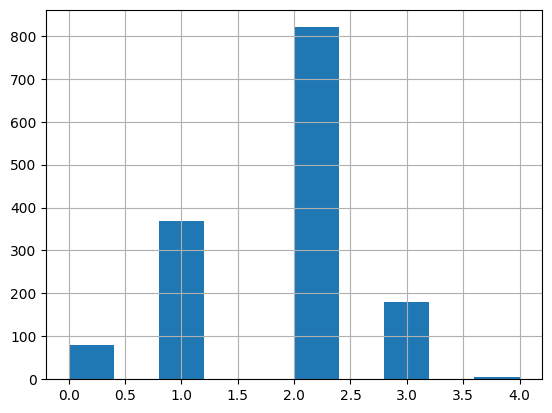

In [132]:
houses_clean['GarageCars'].hist()

## 62	GarageArea

* Size of garage in square feet
* 0 null
* Numeric

<Axes: >

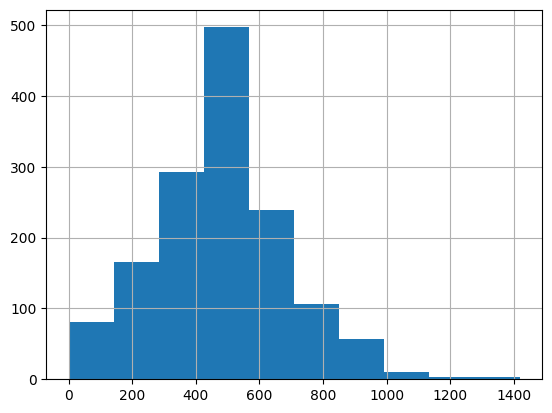

In [133]:
houses_clean['GarageArea'].hist()

## 63	GarageQual

* Garage quality
* 78 nulls
* Nominal

Nulls are no garage, will impute string NA in preprocess

In [134]:
houses_clean['GarageQual'].value_counts()

GarageQual
TA    1306
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

## 64	GarageCond

* Garage condition
* 78 nulls
* Nominal

Nulls are no garage, will impute string NA in preprocess

In [135]:
houses_clean['GarageCond'].value_counts()

GarageCond
TA    1321
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

## 65	PavedDrive

* Paved driveway
* 0	nulls
* Nominal

In [136]:
houses_clean['PavedDrive'].value_counts()

PavedDrive
Y    1336
N      89
P      30
Name: count, dtype: int64

## 66	WoodDeckSF

* Wood deck area in square feet
* 0 nulls
* Numeric

<Axes: >

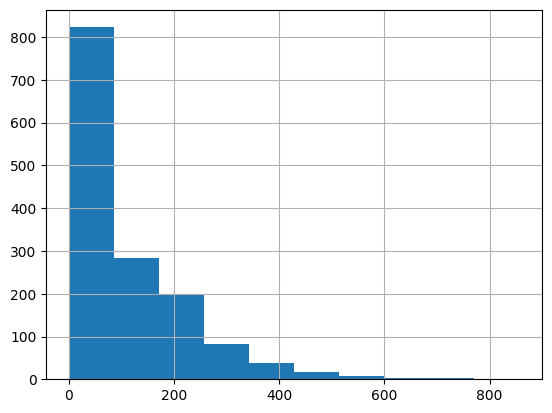

In [137]:
houses_clean['WoodDeckSF'].hist()

## 67	OpenPorchSF

* Open porch area in square feet
* 0 nulls
* Numeric

<Axes: >

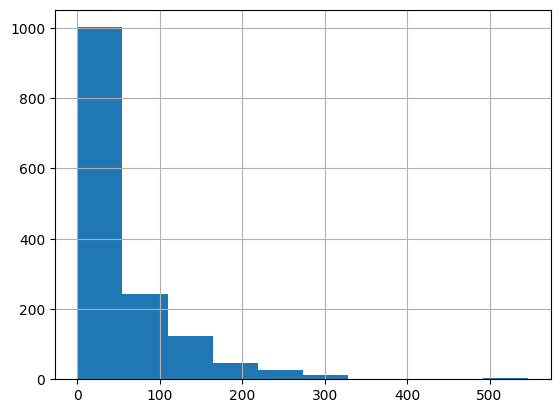

In [138]:
houses_clean['OpenPorchSF'].hist()

## 68	EnclosedPorch

* Enclosed porch area in square feet
* 0	nulls
* Numeric


<Axes: >

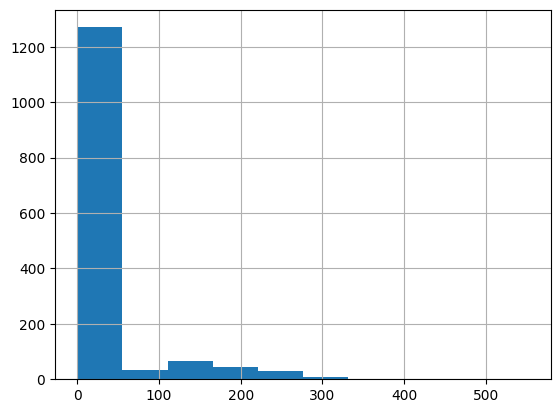

In [139]:
houses_clean['EnclosedPorch'].hist()

## 69	3SsnPorch

* Three season porch area in square feet
* 0	nulls
* Numeric


<Axes: >

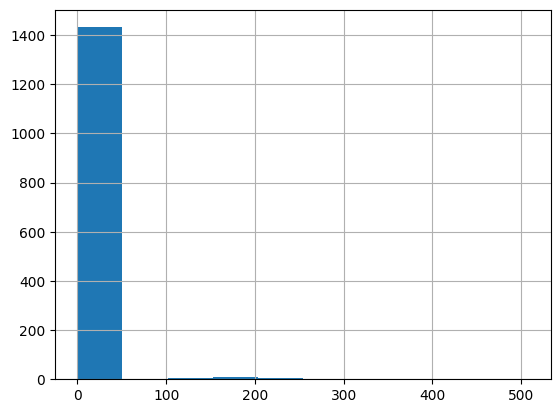

In [140]:
houses_clean['3SsnPorch'].hist()

## 70	ScreenPorch

* Screen porch area in square feet
* 0 nulls
* Numeric


<Axes: >

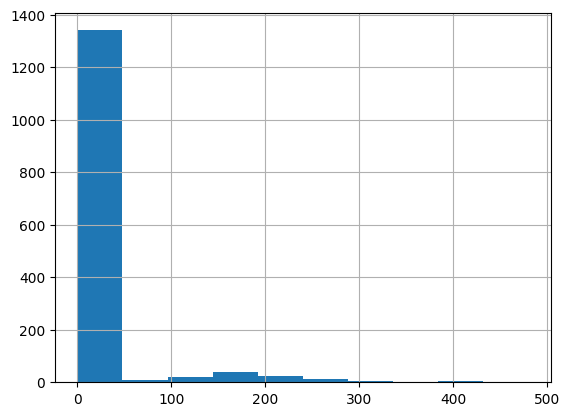

In [141]:
houses_clean['ScreenPorch'].hist()

## 71	PoolArea

* Screen porch area in square feet
* 0 nulls
* Numeric


<Axes: >

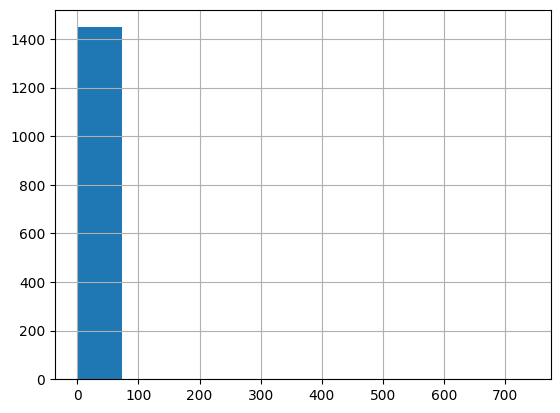

In [142]:
houses_clean['PoolArea'].hist()

## 72	PoolQC

* Pool quality
* 1448 nulls
* Ordinal

Missing values are for homes with no pool, impute to NA for no pool

In [143]:
houses_clean['PoolQC'].isnull().sum()

np.int64(1448)

In [144]:
houses_clean['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [145]:
# Check if any rows with NA for quality also show area in pool area

houses_clean[(houses_clean['PoolQC'].isna()) & (houses_clean['PoolArea'] > 0)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## 73	Fence

* Fence quality
* 1169 nulls
* Nominal

Impute missing values to NA no fence

In [146]:
houses_clean['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

## 74	MiscFeature

* Miscellaneous feature not covered in other categories
* 1408 nulls
* Nominal

Impute values to NA for none misc feature per data dictionary

In [147]:
houses_clean['MiscFeature'].value_counts()

MiscFeature
Shed    49
Othr     2
Gar2     1
TenC     1
Name: count, dtype: int64

## 75	MiscVal

$ Value of miscellaneous feature
* 0 nulls
* Numeric

<Axes: >

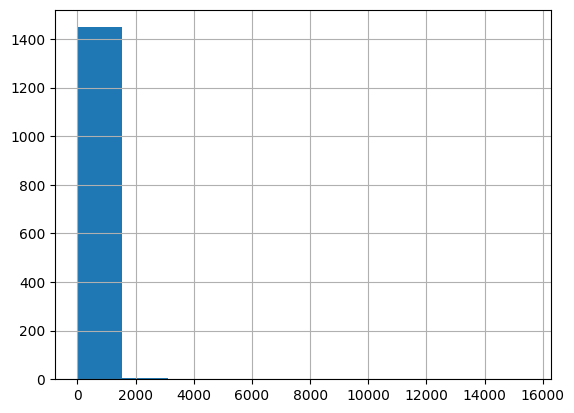

In [148]:
houses_clean['MiscVal'].hist()

## 76	MoSold

* Month Sold (MM)
* 0 nulls
* Numeric


<Axes: >

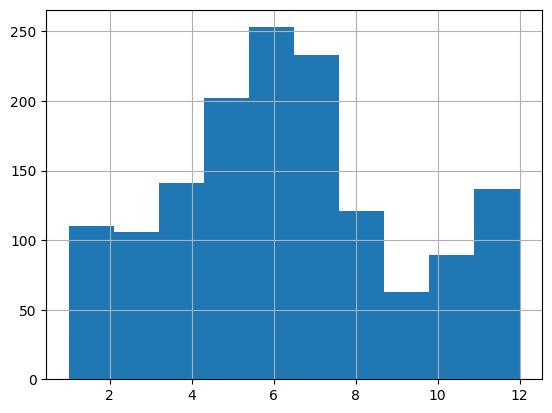

In [149]:
houses_clean['MoSold'].hist()

## 77	YrSold

* Year Sold (YYYY)
* 0 nulls
* Numeric -Year 


In [150]:
houses_clean['YrSold'].value_counts()

YrSold
2009    336
2007    327
2006    313
2008    304
2010    175
Name: count, dtype: int64

<Axes: >

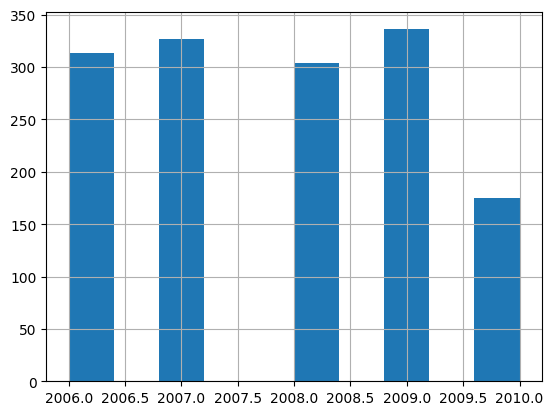

In [177]:
houses_clean['YrSold'].hist()

In [178]:
houses_clean['YrSold'].describe()

count    1455.000000
mean     2007.816495
std         1.328454
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

## 78	SaleType

* Type of sale
* 0 null
* Nominal


In [152]:
houses_clean['SaleType'].value_counts()

SaleType
WD       1263
New       122
COD        42
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

## 79	SaleCondition

* Condition of sale
* 0 nulls
* Nominal


In [153]:
houses_clean['SaleCondition'].value_counts()

SaleCondition
Normal     1193
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

## 80 Sale Price

* Sale price
* 0 nulls
* Numeric


<Axes: >

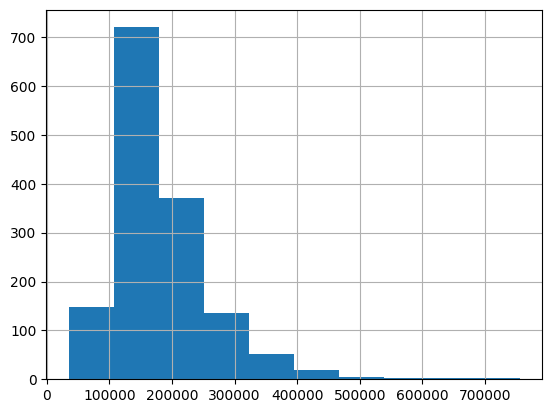

In [154]:
houses_clean['SalePrice'].hist()

In [155]:
# Sale price correlations

corr('SalePrice')

SalePrice        1.000000
OverallQual      0.790999
GrLivArea        0.709451
GarageCars       0.640529
GarageArea       0.623354
TotalBsmtSF      0.613649
1stFlrSF         0.605796
FullBath         0.560223
TotRmsAbvGrd     0.535754
YearBuilt        0.522736
YearRemodAdd     0.506520
GarageYrBlt      0.485860
MasVnrArea       0.478438
Fireplaces       0.466442
BsmtFinSF1       0.386838
LotFrontage      0.351518
WoodDeckSF       0.324334
2ndFlrSF         0.319674
OpenPorchSF      0.315918
HalfBath         0.286536
LotArea          0.263616
BsmtFullBath     0.227209
BsmtUnfSF        0.214193
BedroomAbvGr     0.168083
ScreenPorch      0.111894
PoolArea         0.092403
MoSold           0.046802
3SsnPorch        0.044523
BsmtFinSF2      -0.011704
BsmtHalfBath    -0.017032
MiscVal         -0.025075
LowQualFinSF    -0.025709
YrSold          -0.029380
OverallCond     -0.077876
MSSubClass      -0.083942
EnclosedPorch   -0.129298
KitchenAbvGr    -0.137382
Name: SalePrice, dtype: float64

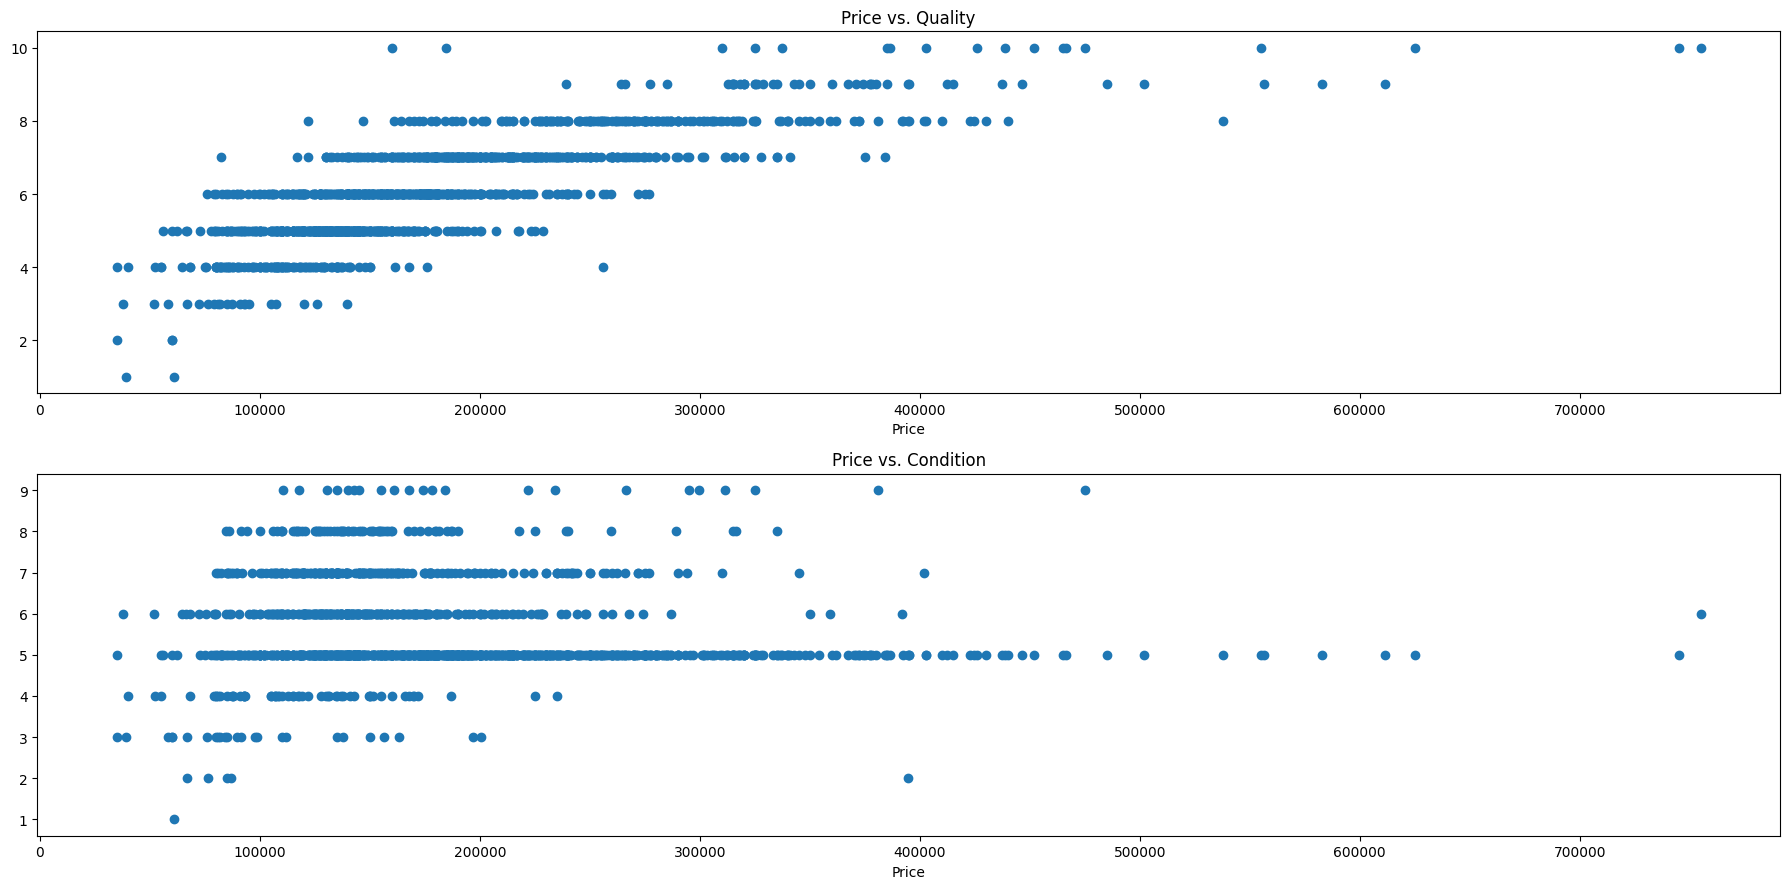

In [172]:
# Plot showing difference between quality and condition sale price

fig, axes = plt.subplots(2,1, figsize=(18,9))

axes[0].scatter(houses_clean['SalePrice'], houses_clean['OverallQual'])
axes[0].set_xlabel('Price')
axes[0].set_title('Price vs. Quality')

axes[1].scatter(houses_clean['SalePrice'], houses_clean['OverallCond'])
axes[1].set_xlabel('Price')
axes[1].set_title('Price vs. Condition')
plt.tight_layout()

In [160]:
# Matrix for correlation heatmap

corr_mat = houses_clean.select_dtypes(include='number').corr()

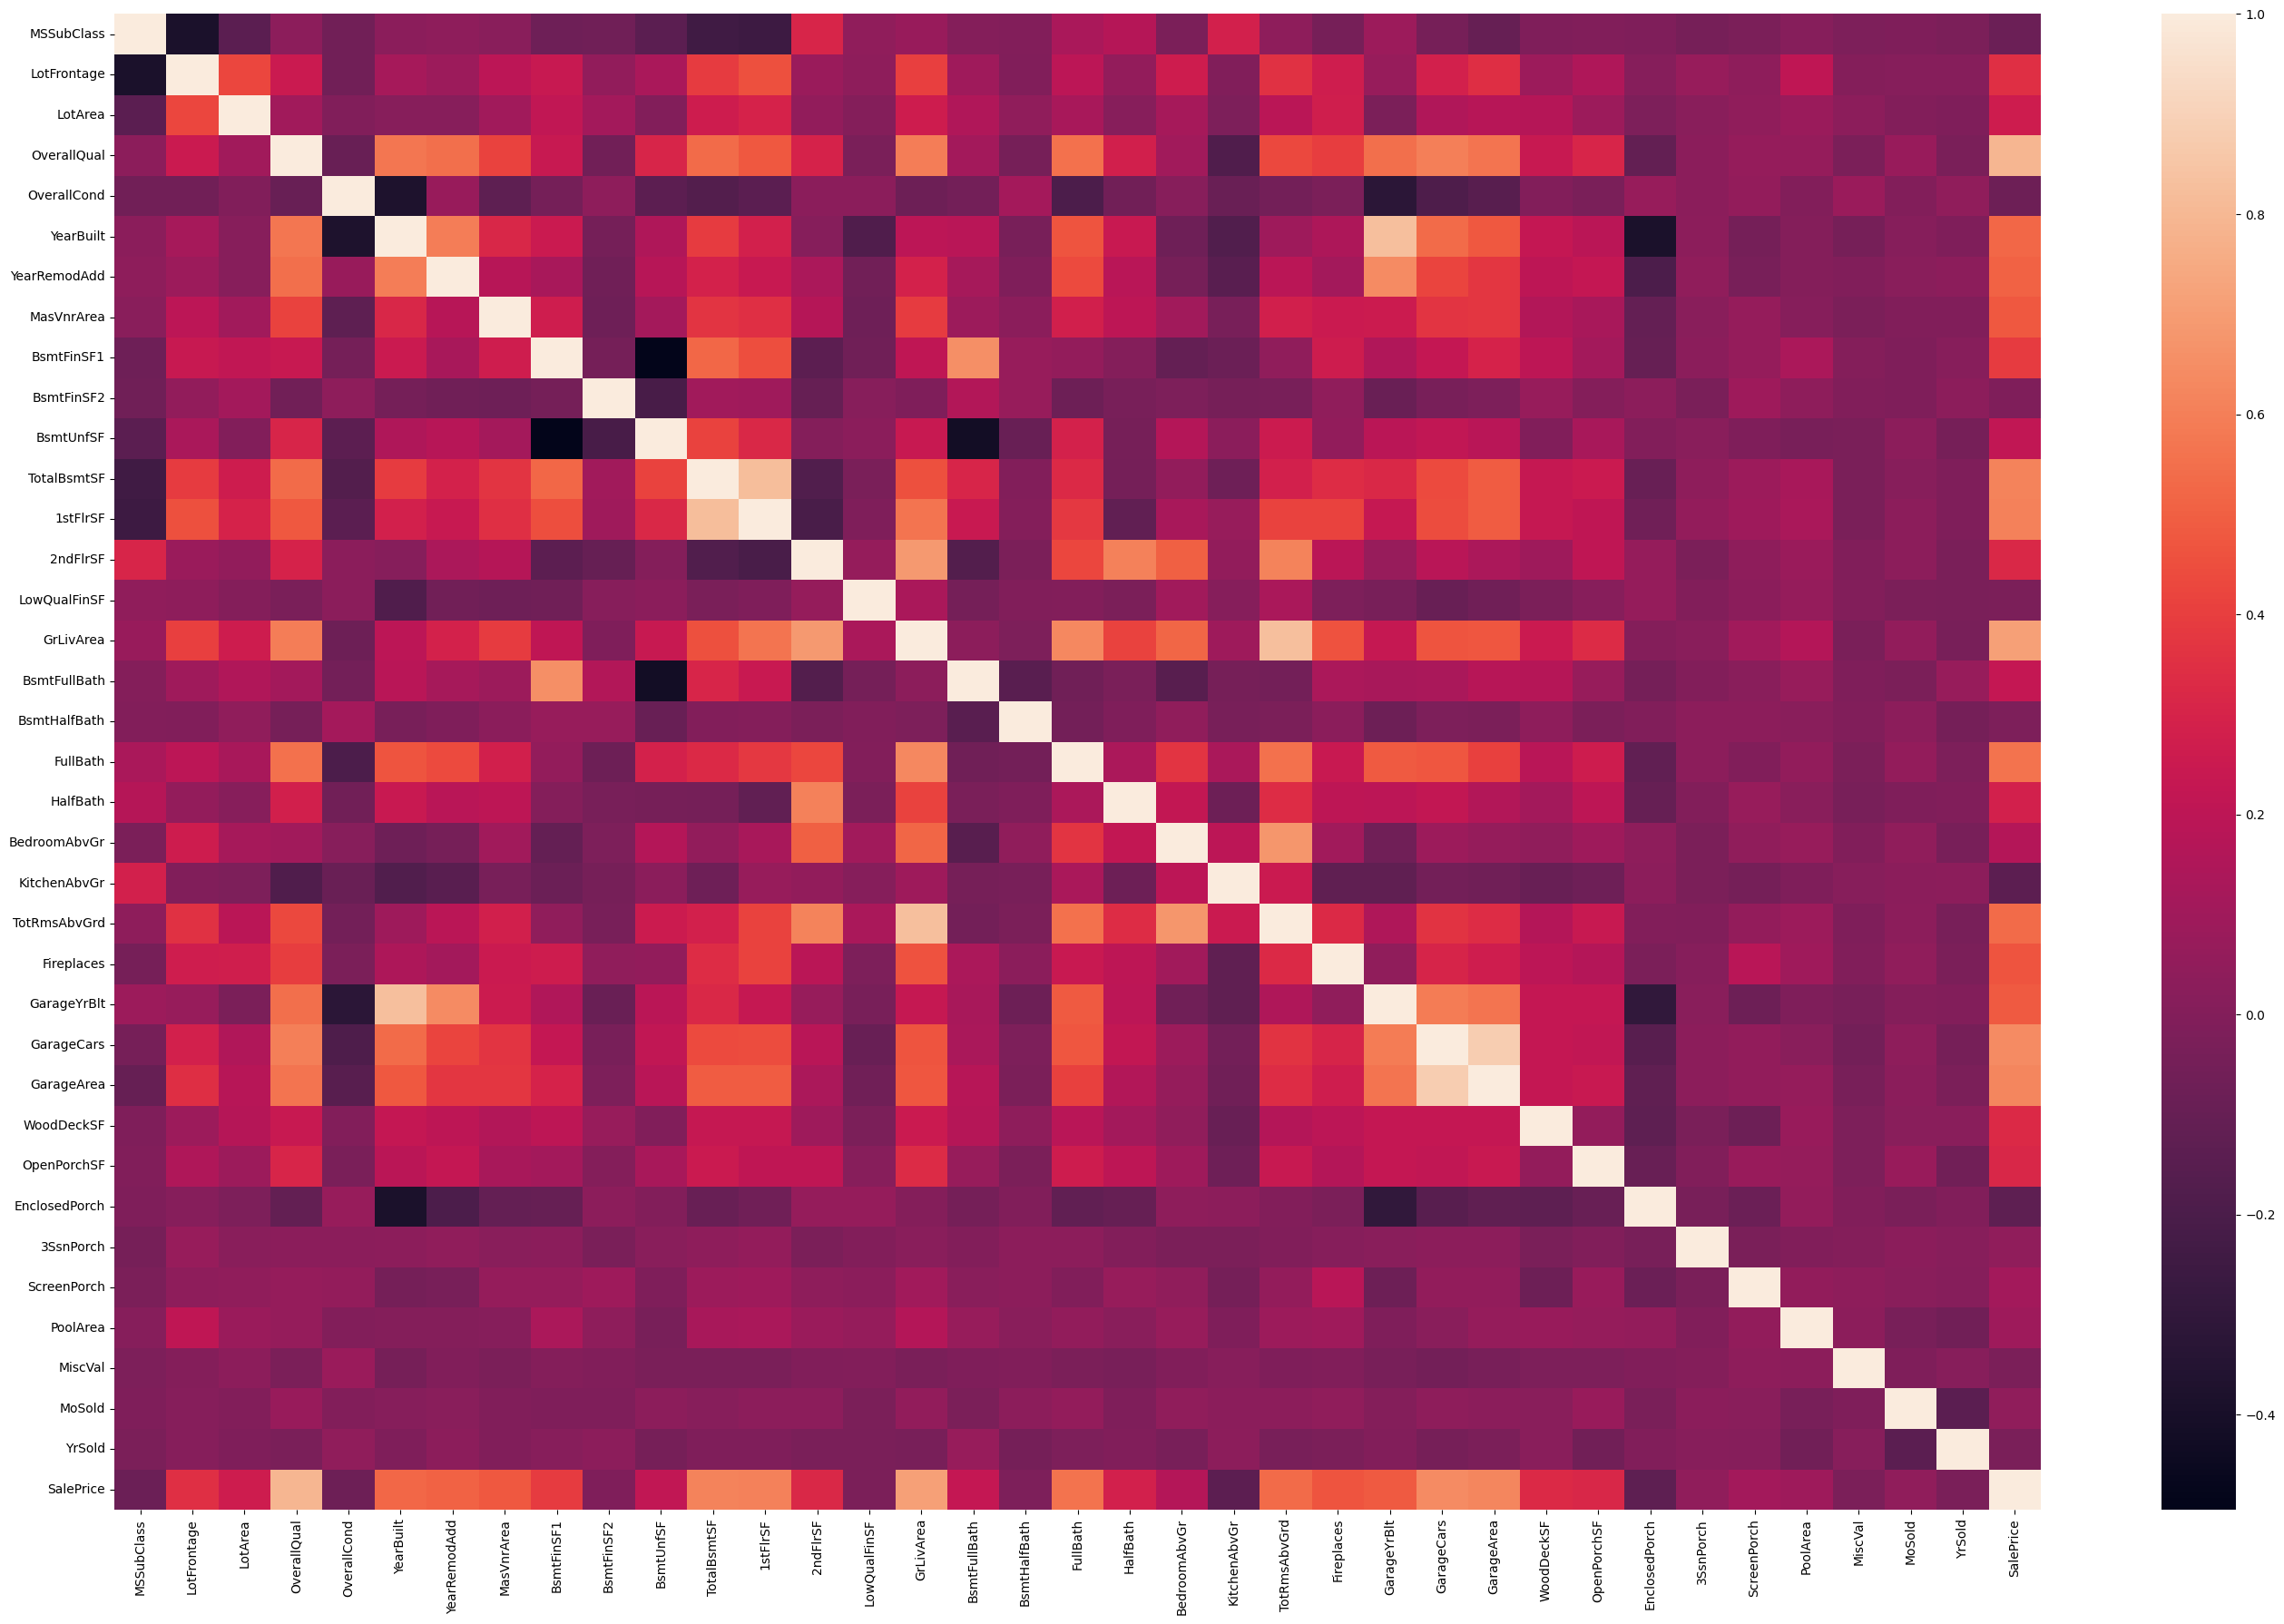

In [176]:
# Correlation heatmap

fig, axes = plt.subplots(figsize=(28,18))

sns.heatmap(corr_mat)
plt.tight_layout()

In [163]:
houses_clean['SalePrice'].describe()

count      1455.00000
mean     180979.58488
std       79536.54149
min       34900.00000
25%      130000.00000
50%      163000.00000
75%      214000.00000
max      755000.00000
Name: SalePrice, dtype: float64

In [157]:
houses_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1455 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1198 non-null   float64
 3   LotArea        1455 non-null   int64  
 4   Street         1455 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1455 non-null   object 
 7   LandContour    1455 non-null   object 
 8   Utilities      1455 non-null   object 
 9   LotConfig      1455 non-null   object 
 10  LandSlope      1455 non-null   object 
 11  Neighborhood   1455 non-null   object 
 12  Condition1     1455 non-null   object 
 13  Condition2     1455 non-null   object 
 14  BldgType       1455 non-null   object 
 15  HouseStyle     1455 non-null   object 
 16  OverallQual    1455 non-null   int64  
 17  OverallCond    1455 non-null   int64  
 18  YearBuilt    

In [179]:
houses_clean.to_csv('../Data and Notes/for_preproc.csv')